# Problem Statement:
Generate the features from the dataset and use them to recommend the books accordingly to the users.

# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

# Importing dataset

**BOOKS DATA**

In [2]:
book_data = pd.read_csv("Books.csv",encoding='Latin1')
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
#As we can see there are 2 null in Book-Author, and 2 in Publisher

In [5]:
book_data.shape

(271360, 8)

**USER DATA**

In [6]:
users_data= pd.read_csv('Users.csv',encoding='Latin1')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
users_data.shape

(278858, 3)

**RATINGS DATA**

In [9]:
ratings_data = pd.read_csv("Ratings.csv",encoding='Latin1')
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
ratings_data.shape

(1149780, 3)

# Data Preparation (Data Cleaning)

In [12]:
# droping the url
#book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [13]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')
book_data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [14]:
pd.set_option('display.max_colwidth',50)
#setting max length of 50

In [15]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [16]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64


*2 values missing in author and publisher*

In [17]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [18]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [19]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [20]:
#2 mistakes, in place of year (DK Publishing Inc) and (Gallimard)

In [21]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [22]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [23]:
#we need to correct the 3 rows
#Function to fix the mismatch data
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [24]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [25]:
book_data.loc[book_data['isbn']=='078946697X']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [26]:
book_data.loc[book_data['isbn']=='0789466953']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [27]:
book_data.loc[book_data['isbn']=='2070426769']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [28]:
#no errors now, all are years
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [29]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [30]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [31]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


**user data**

In [32]:
# users_data size
print(users_data.shape)

(278858, 3)


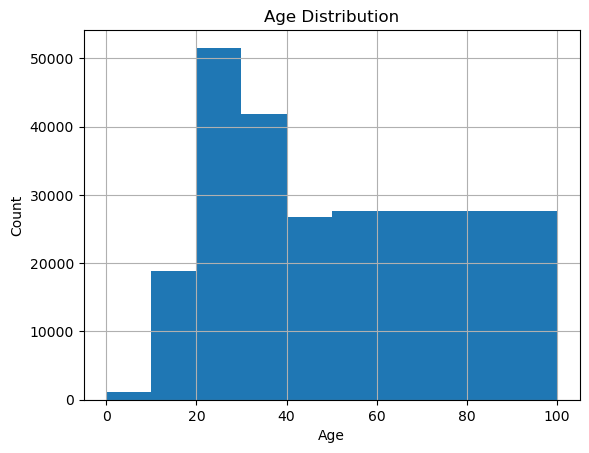

In [33]:
users_data.age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The most active users are ampong those in their 20-40s of age

In [34]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [35]:
# replacing nan with mean of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [36]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [37]:
"""counts = {}
for value in users_data['age']:
    counts[value] = counts.get(value, 0) + 1

print(sorted(counts.items(),key=lambda x:x[1]))"""

"counts = {}\nfor value in users_data['age']:\n    counts[value] = counts.get(value, 0) + 1\n\nprint(sorted(counts.items(),key=lambda x:x[1]))"

<Axes: >

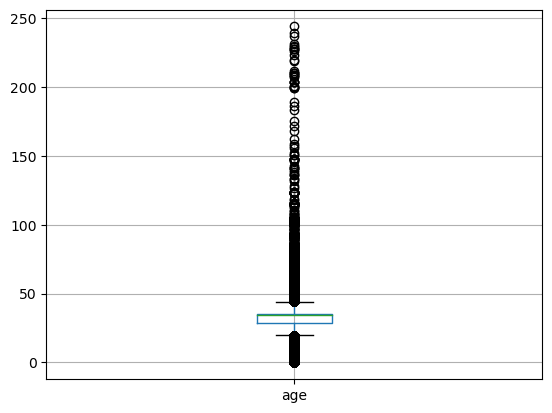

In [38]:
users_data.boxplot(column=['age'],grid=True)

In [39]:
users_data['age'].describe()

count    278858.000000
mean         34.751434
std          11.202003
min           0.000000
25%          29.000000
50%          34.751434
75%          35.000000
max         244.000000
Name: age, dtype: float64

In [40]:
# Ratings Data

In [41]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [42]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [43]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [44]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [45]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# Data Visualizations

Text(0.5, 1.0, 'Top 20 author with number of books')

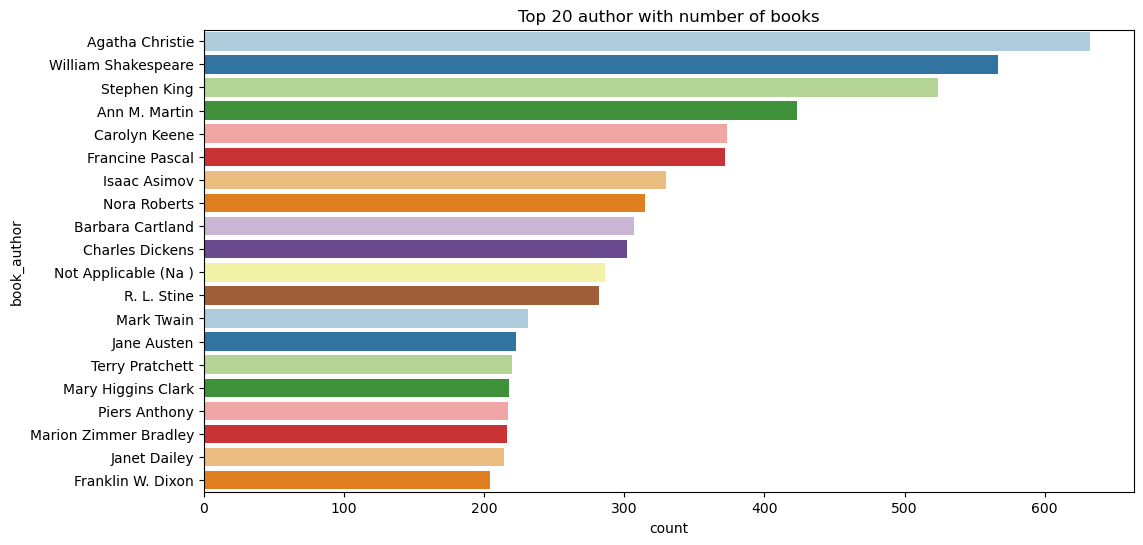

In [46]:
##Top 10 authors with the number of books published
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

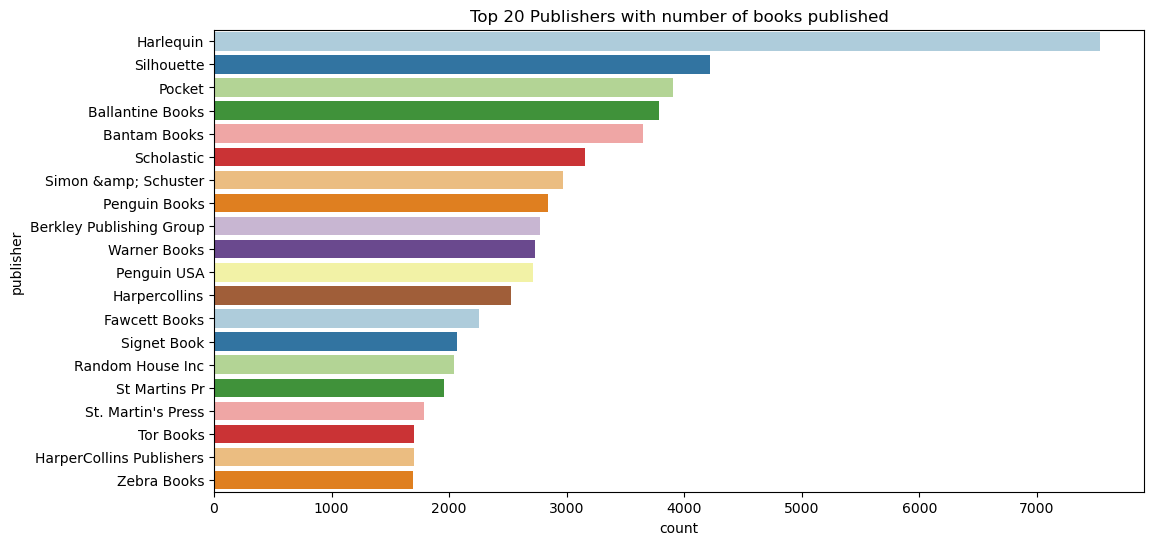

In [47]:
##top 10 publishers with published books

plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

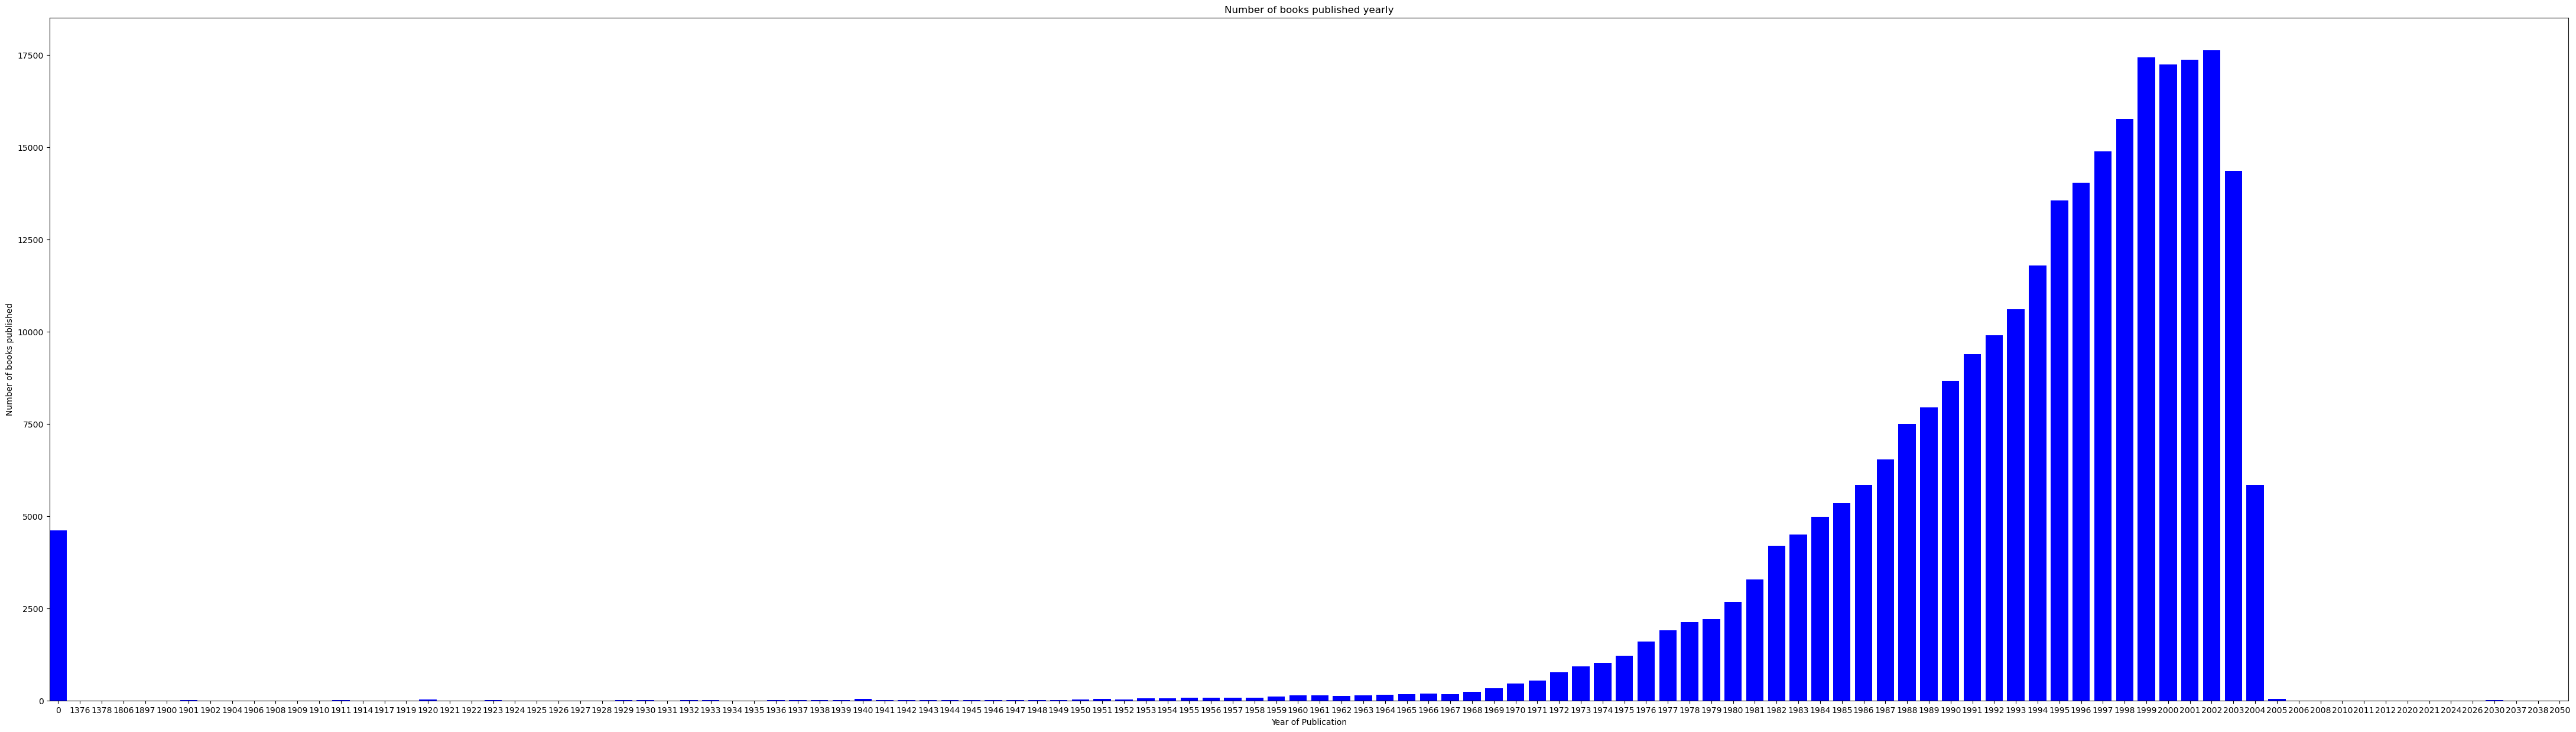

In [48]:
##Number of Books published in yearly.

publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [49]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


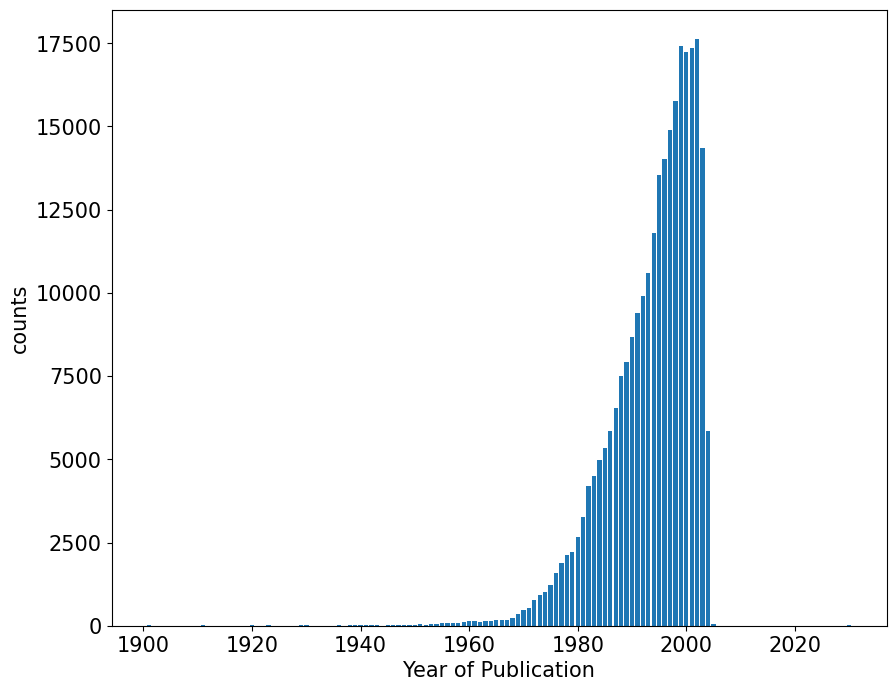

In [50]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

**User_data Dataset**

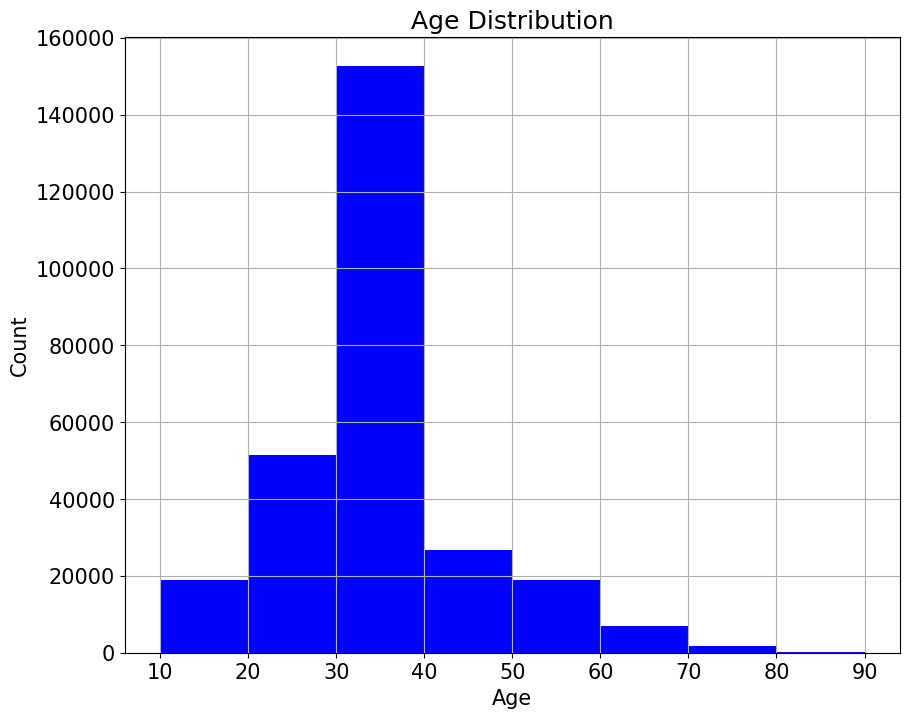

In [51]:
##Age distributions of users_data

plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [52]:
"""most of the user books are from Age 30 to 40.
   same pitch for Age group between 10-20 and 50-60"""

'most of the user books are from Age 30 to 40.\n   same pitch for Age group between 10-20 and 50-60'

**Ratings_data Dataset**

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

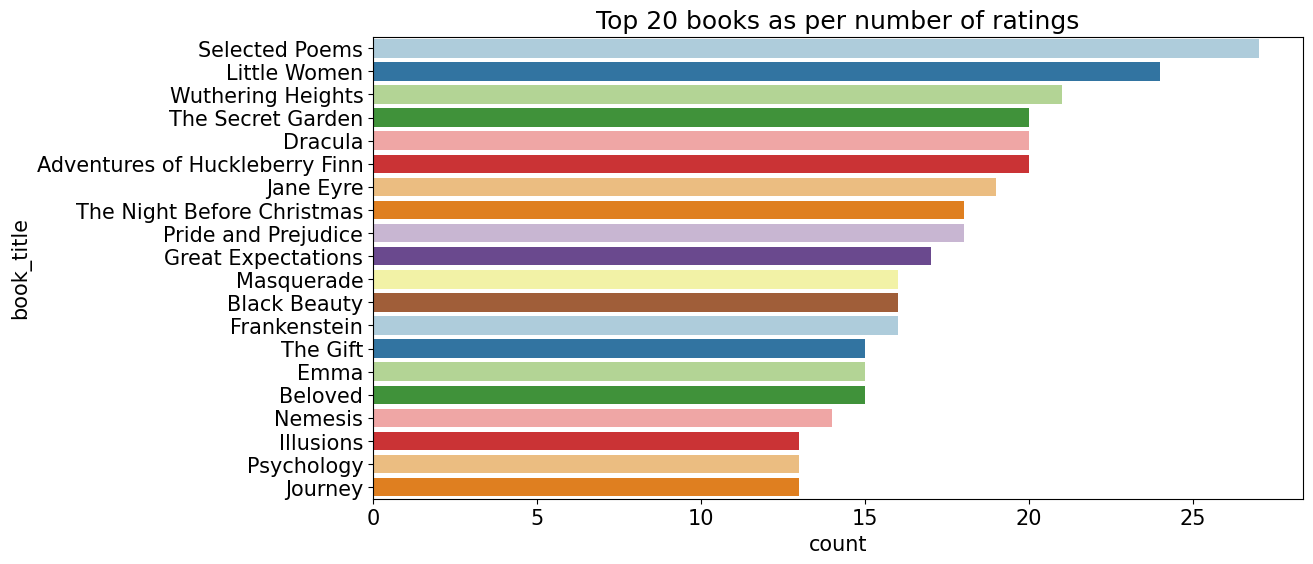

In [53]:
##What are top 10 books as per number of ratings

plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:20])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

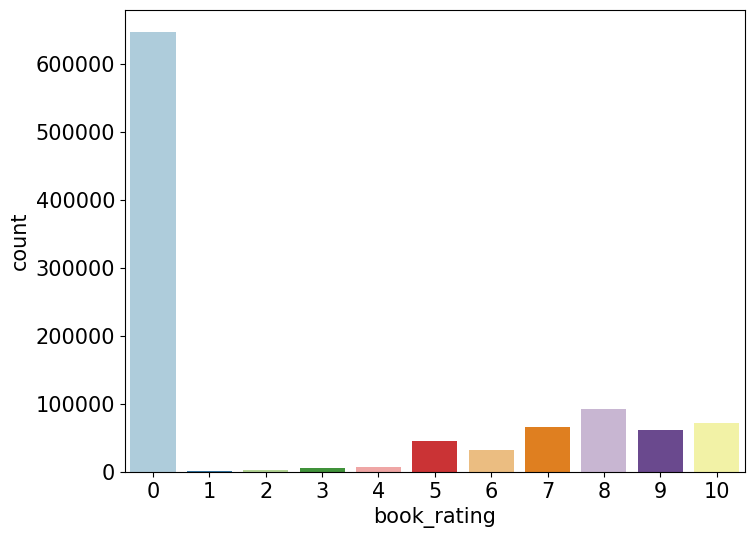

In [54]:
#users ratings by number
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

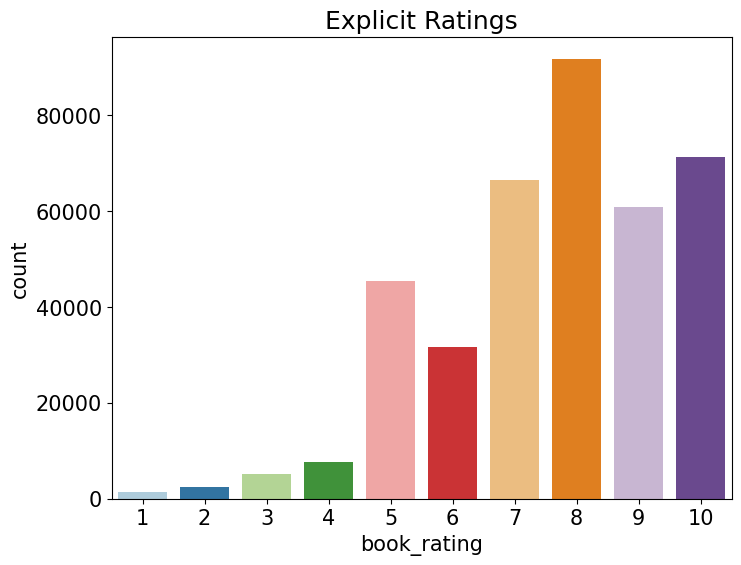

In [55]:
#Books Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Merging the datasets using the shared key 'ISBN'

In [56]:
ratings_with_book_titles = ratings_data.merge(book_data,on='isbn')

In [57]:
complete_df = ratings_with_book_titles.merge(users_data.drop("age", axis=1), on="user_id")
complete_df.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986.0,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994.0,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996.0,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa"


we will perform the following
* Splits location strings by commas.
* Keeps only the last part (country name).
* Removes leading/trailing whitespaces.

In [58]:
#complete_df['location'] = complete_df['location'].str.split(',').str[-1].str.strip()

In [59]:
complete_df.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986.0,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994.0,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996.0,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa"


___

# Popularity Based  Recommender system

- ### Top 50 books with highest average ratings

In [60]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [61]:
ratings_with_book_titles.head()

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [62]:
# creating a dataframe with book title and number of ratings on the book(Book-ratings)
# we will use reset_index() to form a dataframe otherwise it will be a list

num_rating_df = ratings_with_book_titles.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df

,book_title,book_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Ã?lpiraten.,2
241067,Ã?Ã?rger mit Produkt X. Roman.,4
241068,Ã?Ã?sterlich leben.,1
241069,Ã?Ã?stlich der Berge.,3


In [63]:
# we will calculate the average rating using mean function

avg_rating_df = ratings_with_book_titles.groupby('book_title').mean()['book_rating'].reset_index()
avg_rating_df.rename(columns={'book_rating':'avg_rating'},inplace=True)
avg_rating_df

,book_title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Ã?lpiraten.,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,5.250000
241068,Ã?Ã?sterlich leben.,7.000000
241069,Ã?Ã?stlich der Berge.,2.666667


In [64]:
# Now the final dataframe will be popular_df after merging above two dataframes on Book Title attribute

popular_df = num_rating_df.merge(avg_rating_df,on='book_title')
popular_df

,book_title,book_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Ã?lpiraten.,2,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Ã?sterlich leben.,1,7.000000
241069,Ã?Ã?stlich der Berge.,3,2.666667


- ### Considering those books whose book rating is more than 250

In [65]:
#filtering books with num_rating>250 and then sorting the books and displaying top 50 books

popular_df = popular_df[popular_df['book_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [66]:
# Some books have duplicate titles , so droping duplicates and the displaying title, Author,Image,num_rating,avg_rating

popular_df = popular_df.merge(book_data,on='book_title').drop_duplicates('book_title')[['book_title','book_author','image_url_m','book_rating','avg_rating']]

In [67]:
popular_df.head()

,book_title,book_author,image_url_m,book_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


___

# Collaborative Filtering Based Recommender System

In [68]:
# Select user IDs with more than 200 book ratings
min_ratings_threshold = 200

# Count book ratings per user
num_ratings_per_user = complete_df.groupby('user_id')['book_rating'].count()

# Filter users with more than the minimum threshold
knowledgeable_user_ids = num_ratings_per_user[num_ratings_per_user > min_ratings_threshold].index

In [69]:
# Filter ratings from knowledgeable users
knowledgeable_user_ratings = complete_df[complete_df['user_id'].isin(knowledgeable_user_ids)]

In [70]:
# Select books with more than 50 ratings
min_ratings_count_threshold=50
rating_counts= knowledgeable_user_ratings.groupby('book_title').count()['book_rating']
popular_books = rating_counts[rating_counts >= min_ratings_count_threshold].index

In [71]:
final_ratings =  knowledgeable_user_ratings[knowledgeable_user_ratings['book_title'].isin(popular_books)]

In [72]:
final_ratings

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,location
38,6543,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"strafford, missouri, usa"
39,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"strafford, missouri, usa"
40,6543,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"strafford, missouri, usa"
41,6543,0312966970,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999.0,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,http://images.amazon.com/images/P/0312966970.0...,"strafford, missouri, usa"
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001.0,Warner Vision,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...,http://images.amazon.com/images/P/0446605484.0...,"strafford, missouri, usa"
...,...,...,...,...,...,...,...,...,...,...,...
842419,72352,1551668874,0,Heartbreaker,Linda Howard,2002.0,Mira,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,http://images.amazon.com/images/P/1551668874.0...,"samieira, pontevedra, spain"
842458,72352,0671670069,10,Guardian Angel,Julie Garwood,1990.0,Pocket,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,http://images.amazon.com/images/P/0671670069.0...,"samieira, pontevedra, spain"
856993,4385,0786868716,0,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,"albq, new mexico, usa"
857035,4385,0440221471,10,The Runaway Jury,JOHN GRISHAM,1997.0,Dell,http://images.amazon.com/images/P/0440221471.0...,http://images.amazon.com/images/P/0440221471.0...,http://images.amazon.com/images/P/0440221471.0...,"albq, new mexico, usa"


In [73]:
#creating the pivot table
pt = final_ratings.pivot_table(index='book_title',columns='user_id',values='book_rating')
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [74]:
#replacing NaN with 0
pt.fillna(0,inplace=True)
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# we need to find the cosine similarity for pivot table

In [75]:
from sklearn.metrics.pairwise import cosine_similarity 

In [76]:
similarity_score = cosine_similarity(pt)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [77]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:11]
    
    data = []
    
    for i in similar_books:
        item = []
        temp_df = book_data[book_data['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))

        data.append(item)
    return data

In [78]:
recommend("A Walk to Remember")

[['The Rescue', 'Nicholas Sparks'],
 ['Nights in Rodanthe', 'Nicholas Sparks'],
 ['The Notebook', 'Nicholas Sparks'],
 ['Granny Dan', 'DANIELLE STEEL'],
 ['A Bend in the Road', 'Nicholas Sparks'],
 ['The Dogs of Babel (Today Show Book Club #12)', 'Carolyn Parkhurst'],
 ['The Reptile Room (A Series of Unfortunate Events, Book 2)',
  'Lemony Snicket'],
 ['Message in a Bottle', 'Nicholas Sparks'],
 ['Accident', 'Danielle Steel'],
 ['The Guardian', 'Nicholas Sparks']]

In [79]:
recommend("Prodigal Summer")

[['Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
  'ROBERT PIRSIG'],
 ['The Poisonwood Bible', 'Barbara Kingsolver'],
 ['Love in the Time of Cholera (Penguin Great Books of the 20th Century)',
  'Gabriel Garcia Marquez'],
 ["The Bonesetter's Daughter", 'Amy Tan'],
 ['The Fourth Hand', 'John Irving'],
 ['Balzac and the Little Chinese Seamstress : A Novel', 'DAI SIJIE'],
 ['The Red Tent (Bestselling Backlist)', 'Anita Diamant'],
 ['The Celestine Prophecy (Celestine Prophecy)', 'James Redfield'],
 ['Hearts in Atlantis', 'Stephen King'],
 ['Mother of Pearl', 'Melinda Haynes']]

In [80]:
recommend("Harry Potter and the Goblet of Fire (Book 4)")

[['Harry Potter and the Prisoner of Azkaban (Book 3)', 'J. K. Rowling'],
 ['Harry Potter and the Chamber of Secrets (Book 2)', 'J. K. Rowling'],
 ['Harry Potter and the Order of the Phoenix (Book 5)', 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN'],
 ['Remember Me', 'Mary Higgins Clark'],
 ["Bridget Jones's Diary", 'Helen Fielding'],
 ['Wicked: The Life and Times of the Wicked Witch of the West',
  'Gregory Maguire'],
 ['The Witness', 'Sandra Brown']]

In [81]:
recommend("Year of Wonders")

[['The Eight', 'Katherine Neville'],
 ['A Heartbreaking Work of Staggering Genius', 'Dave Eggers'],
 ['Bridget Jones: The Edge of Reason', 'Helen Fielding'],
 ["Drowning Ruth (Oprah's Book Club)", 'CHRISTINA SCHWARZ'],
 ['Midwives: A Novel', 'Chris Bohjalian'],
 ['The Mists of Avalon', 'MARION ZIMMER BRADLEY'],
 ["The Sweet Potato Queens' Book of Love", 'JILL CONNER BROWNE'],
 ["The Pilot's Wife : A Novel", 'Anita Shreve'],
 ['Into the Wild', 'Jon Krakauer'],
 ['The Temple of My Familiar', 'Alice Walker']]

In [ ]:
recommend("You Belong To Me")

In [ ]:
book_names=pt.index
book_names

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(complete_df,open('complete.pkl','wb'))
pickle.dump(pt,open('book_pivot.pkl','wb'))
pickle.dump(book_data,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity.pkl','wb'))
pickle.dump(book_names,open('book_names.pkl','wb'))